# Exercise 1

Work on this before the next lecture on 22 March. We will talk about questions, comments, and solutions during the exercise after the second lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-comp-2018/issues/1). If you worked on things together with others please add their names to the notebook so we can see who formed groups.


## Objective

There are two objectives for this set of exercises:

* get you started using python, scikit-learn, matplotlib, and GitHub. You will be using them a lot during the course, so make sure you get a good foundation to build on.

* working through the steps of opening a new dataset, plotting the data, fitting a model to it, evaluating your model, and deciding on model complexity.

## Question 0

Install python, scikit-learn (v0.19), matplotlib, jupyter and git.

Instructions for doing so: https://github.com/wildtreetech/advanced-comp-2018/blob/master/install.md

Documentation and guides for the various tools:

* [jupyter quickstart](http://jupyter.readthedocs.io/en/latest/content-quickstart.html)
* [try jupyter without installing anything](https://try.jupyter.org/)
* [matplotlib homepage](http://matplotlib.org/)
* [matplotlib gallery](http://matplotlib.org/gallery.html)
* [scikit-learn homepage](http://scikit-learn.org/stable/)
* [scikit-learn examples](http://scikit-learn.org/stable/auto_examples/index.html)
* [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
* [try git online without installing anything](https://try.github.io/levels/1/challenges/1)


### GitHub and git

* [Create a GitHub account]() for yourself or use one you already have.
* Follow the guide on [creating a new repository](https://help.github.com/articles/create-a-repo/). Name the repository "advanced-comp-2018".

Read up on `git clone`, `git pull`, `git push`, `git add` and `git commit`. Once you master these five commands you should be good for this course. There is a whole universe of complex things that `git` can do for you, don't worry about them for now. Once you feel comfortable with the basics you can always step it up later.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [5]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

In the lecture we used the nearest neighbour classifier to classify points from a toy dataset into either "red" or "blue" classes. We investigated how the performance changes as a function of model complexity and what this means for the performance of our classifier on unseen data. 

* plot your dataset
* split your dataset into a training and testing set. Comment on how you decided to split your data.
* evaluate the performance of the classifier on your training dataset.
* evaluate the performance of the classifier on your testing dataset.
* repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment
  on what you see. Is there a "best" way to split your data?
* comment on why the two performance estimates agree or disagree.
* plot the accuracy of the classifier as a function of `n_neighbors`.
* comment on the similarities and differences between the performance on the testing and training dataset.
* is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?

Use `make_blobs(n_samples=400, centers=23, random_state=42)` to create a simple dataset and use the `KNeighborsClassifier` classifier to answer the above questions.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

NameError: name 'np' is not defined

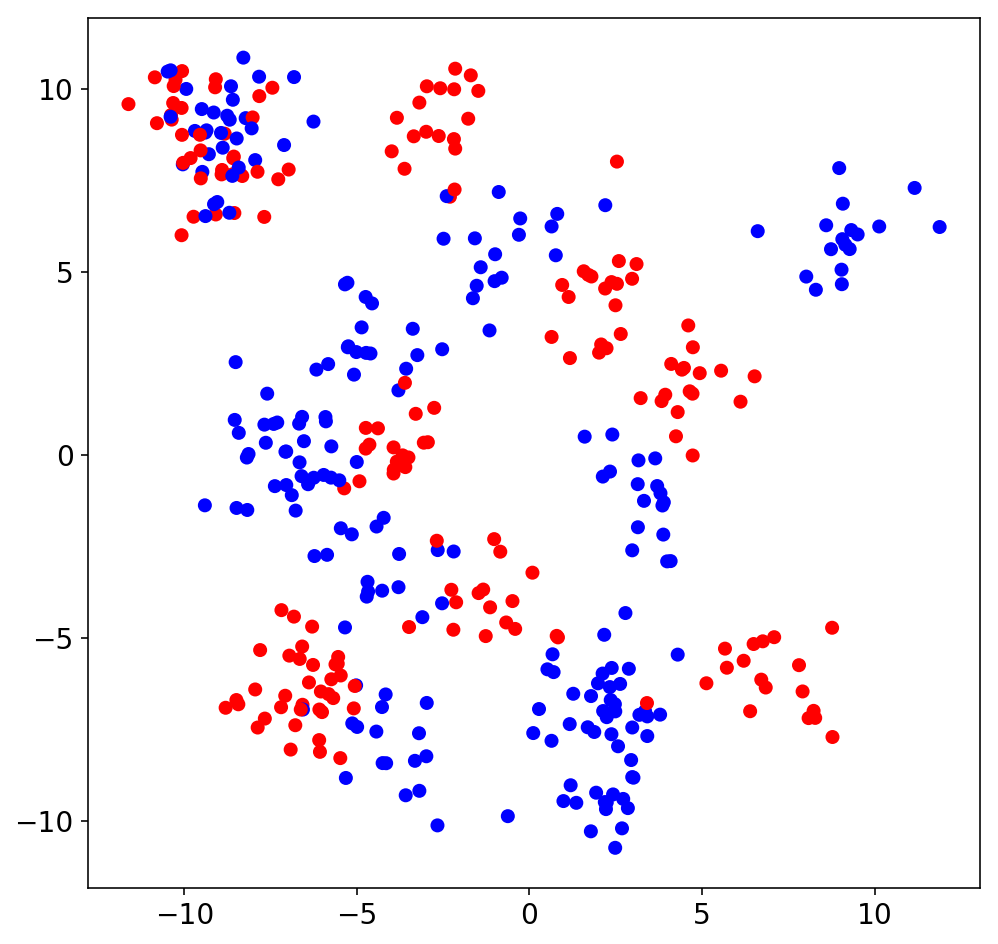

In [7]:
#plot your dataset
plt.scatter(X[:, 0], X[:, 1], c=y)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#split your dataset into a training and testing set. 
#Comment on how you decided to split your data.

X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.9,random_state=123)
#the training set is split as 90% of the data using the random_seed at 123

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

#evaluate the performance of the classifier on your training dataset
print("Train: {:.3f}".format(clf.score(X_train, y_train)))
#evaluate the performance of the classifier on your testing dataset
print("Test: {:.3f}".format(clf.score(X_test, y_test)))


Train: 0.903
Test: 0.900


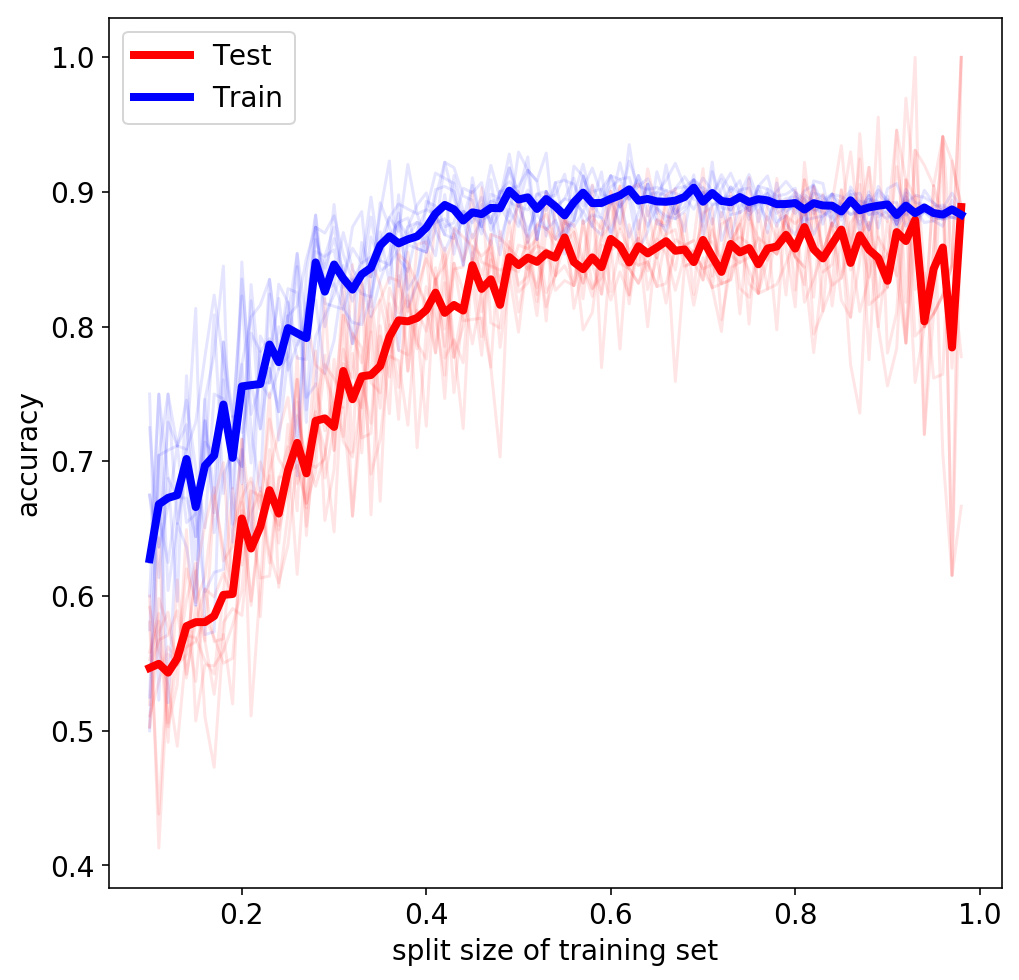

In [9]:
#repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment on what you see. 
#Is there a "best" way to split your data?
p_train = np.arange(0.1,0.99,0.01)
accuracy_train = []
accuracy_test = []

for pt in p_train:
    acc_test=[]
    acc_train=[]
    for n in range(10):
        X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=pt)
        clf = KNeighborsClassifier(n_neighbors=9)
        clf.fit(X_train, y_train)
        acc_train.append(clf.score(X_train, y_train))
        acc_test.append(clf.score(X_test, y_test))
        
    accuracy_test.append(acc_test)
    accuracy_train.append(acc_train)

accuracy_test=np.array(accuracy_test)
accuracy_train=np.array(accuracy_train)
for n in range(10):
    plt.plot(p_train, accuracy_train[:,n], c='b', alpha=0.1)
    plt.plot(p_train, accuracy_test[:,n], c='r', alpha=0.1)
    
plt.plot(p_train, accuracy_test.mean(axis=1), label='Test', c='r', lw=4)
plt.plot(p_train, accuracy_train.mean(axis=1), label='Train', c='b', lw=4)
plt.xlabel('split size of training set')
plt.ylabel('accuracy')
plt.legend(loc='best')

#for a training set < 30% the data set seems to be to big to accurately create a kNN model
#(here for k=9). But for a to small test-set, the generalization error has a very large variance
#because it strongly depends on the very few picked test points

#comment on why the two performance estimates agree or disagree.
#the training accuracy will mostly be better, as these points are used to generate the model, 
#while the testing points should represent new data. An exception to this might be for small training sets,
#which per chance fit very well to the model or for test sets with lots of noise and 
#where for k>1 the training accuracy might be not so good

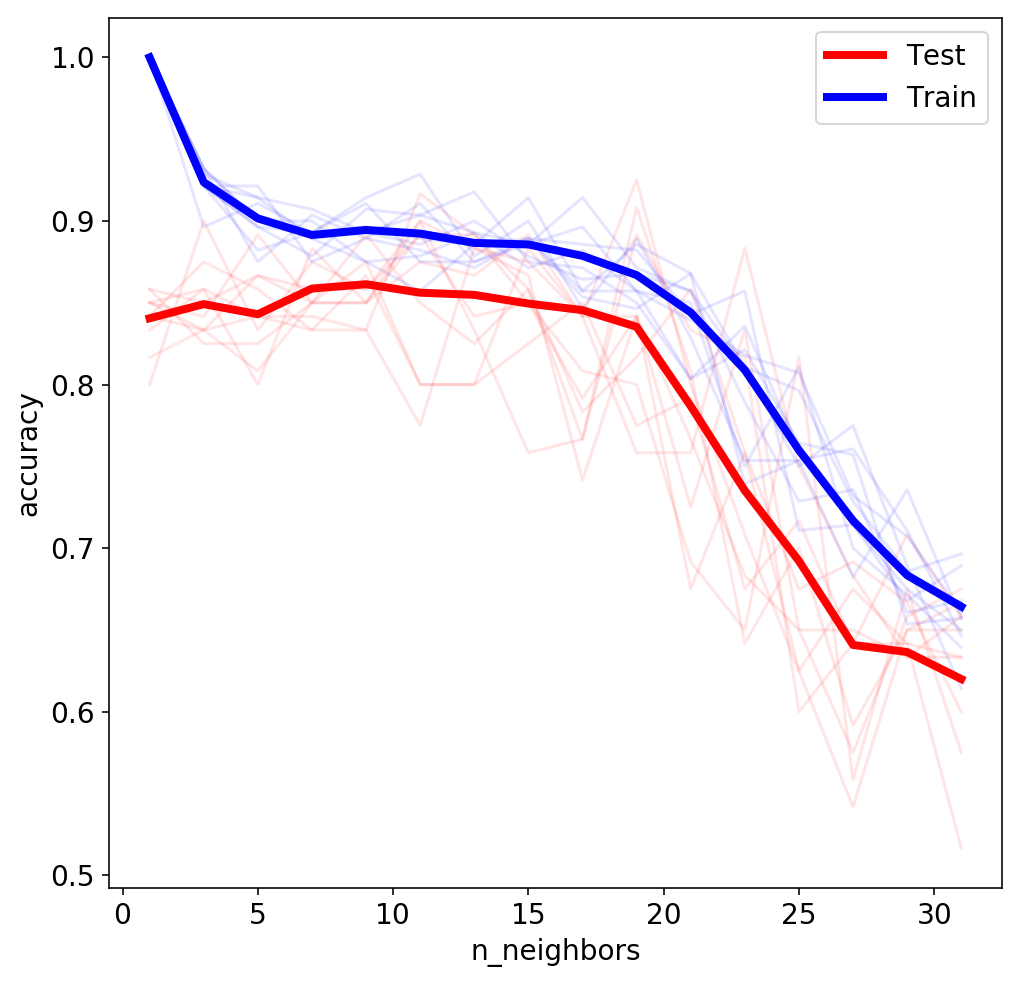

In [10]:


#plot the accuracy of the classifier as a function of n_neighbors.
k_train = np.arange(1,33,2)
accuracy_train = []
accuracy_test = []

for kt in k_train:
    acc_test=[]
    acc_train=[]
    for n in range(50):
        X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.7)
        clf = KNeighborsClassifier(n_neighbors=kt)
        clf.fit(X_train, y_train)
        acc_train.append(clf.score(X_train, y_train))
        acc_test.append(clf.score(X_test, y_test))
        
    accuracy_test.append(acc_test)
    accuracy_train.append(acc_train)

accuracy_test=np.array(accuracy_test)
accuracy_train=np.array(accuracy_train)
for n in range(10):
    plt.plot(k_train, accuracy_train[:,n], c='b', alpha=0.1)
    plt.plot(k_train, accuracy_test[:,n], c='r', alpha=0.1)

#or use validation_curve(...) function!!
plt.plot(k_train, accuracy_test.mean(axis=1), label='Test', c='r', lw=4)
plt.plot(k_train, accuracy_train.mean(axis=1), label='Train', c='b', lw=4)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(loc='best')

#comment on the similarities and differences between the performance on the testing and training dataset.
#the accuracy of the training set is the best for k=1, because then the model basically just remembers the
#label of the training data. The accuracy then continiously decreases with k, 
#as the labels are approximated more smoothly. 
#The test accuracy starts at an intermediate value (underfitting) and increases to its optimal value at around k=15.
#After this the test accuracy starts to decreasy again, as the model is overfit to the training data.
#In general the training accuracy is mostly higher than the test accuracy and also has less variability.


#is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
#4 neighbors constitute a more complicated model, as there are more indivual areas and islands

In [11]:
from sklearn.model_selection import GridSearchCV

#find the best setting of n_neighbors for this dataset.
param_grid = {'n_neighbors':  np.arange(1, 33, 2)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
#or use validation_curve(...) function to obtain all values along the param_grid curve

grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

#why is this the best setting?
#Because for this random distribution and validation-split it best categorizes the test set.
#It neither under- nor overfittes the model.
#Also the best n_neigbors parameter can change depending on the validation split 
#e.g. n_neigbors=7 for cv=10 and =5 for cv=2

best mean cross-validation score: 0.857
best parameters: {'n_neighbors': 3}
test-set score: 0.858


---

## Question 2

This is a regression problem. It mostly follows the setup of the classification problem so you should be able to reuse some of your work.

* plot your dataset
* fit a kNN regressor with varying number of `n_neighbors` and compare each regressors predictions to the location of the training and testing points. 
* plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.
* comment on the similarities and differences between the performance on the testing and training dataset.
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?
* can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?

Use `make_regression()` to create the dataset and use `KNeighborsRegressor` to answer the above questions. Take a look at scikit-learn's [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the mean squared error.

In [12]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

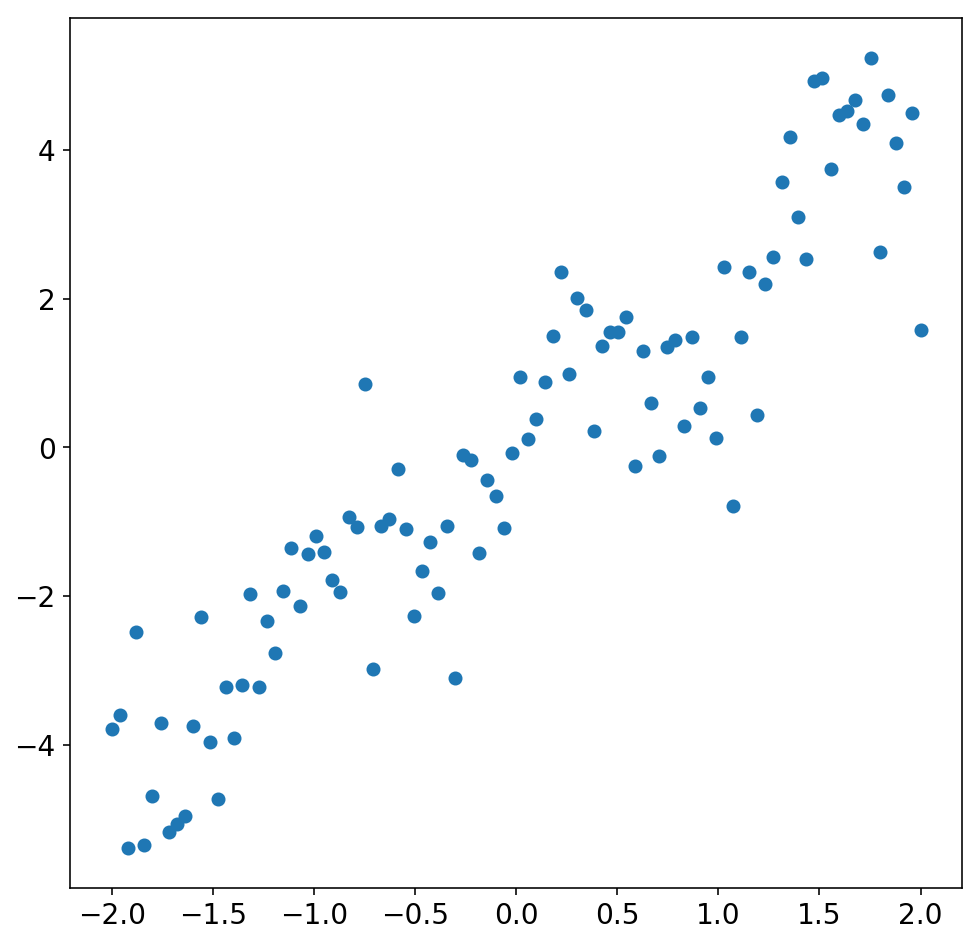

In [13]:
# plot your dataset

X, y = make_regression()
plt.scatter(X,y)
line = np.linspace(-2, 2, 100).reshape(-1, 1)

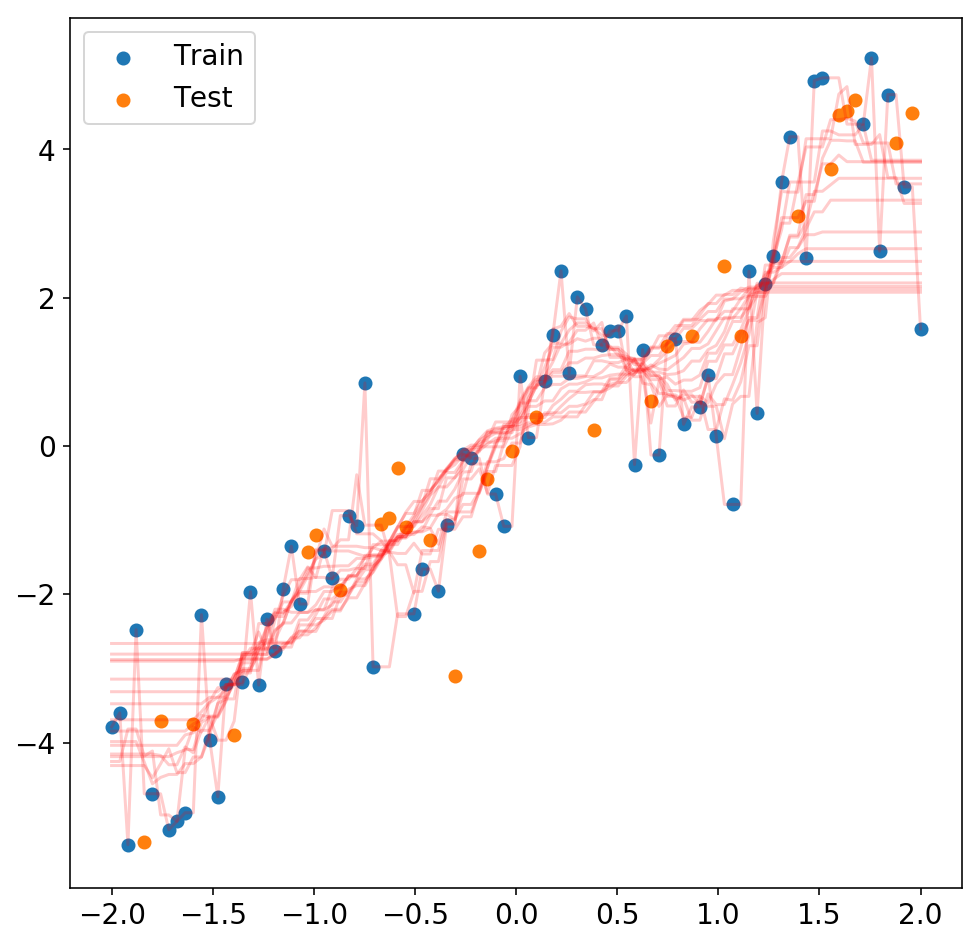

In [14]:
from sklearn.neighbors import KNeighborsRegressor

#fit a kNN regressor with varying number of n_neighbors
k_train = np.arange(1,33,2)
accuracy_train = []
accuracy_test = []

X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.7)
plt.scatter(X_train,y_train, label='Train')
plt.scatter(X_test,y_test,label='Test')

for kt in k_train:
    rgr = KNeighborsRegressor(n_neighbors=kt)
    rgr.fit(X_train, y_train)
    plt.plot(line, rgr.predict(line), '-r', alpha=0.2)
    
plt.legend(loc='best')
#and compare each regressors predictions to the location of the training and testing points.
#for k=1, the line kNN regression goes through all the test-points. 
#The more neighbors are used, the smoother the kNN regression becomes.
#Also for k from 1-33, the outliers in the test set are never captured by the model, 
#while the outliers in the training set are captured at small k's

In [15]:
rgr.metric

'minkowski'

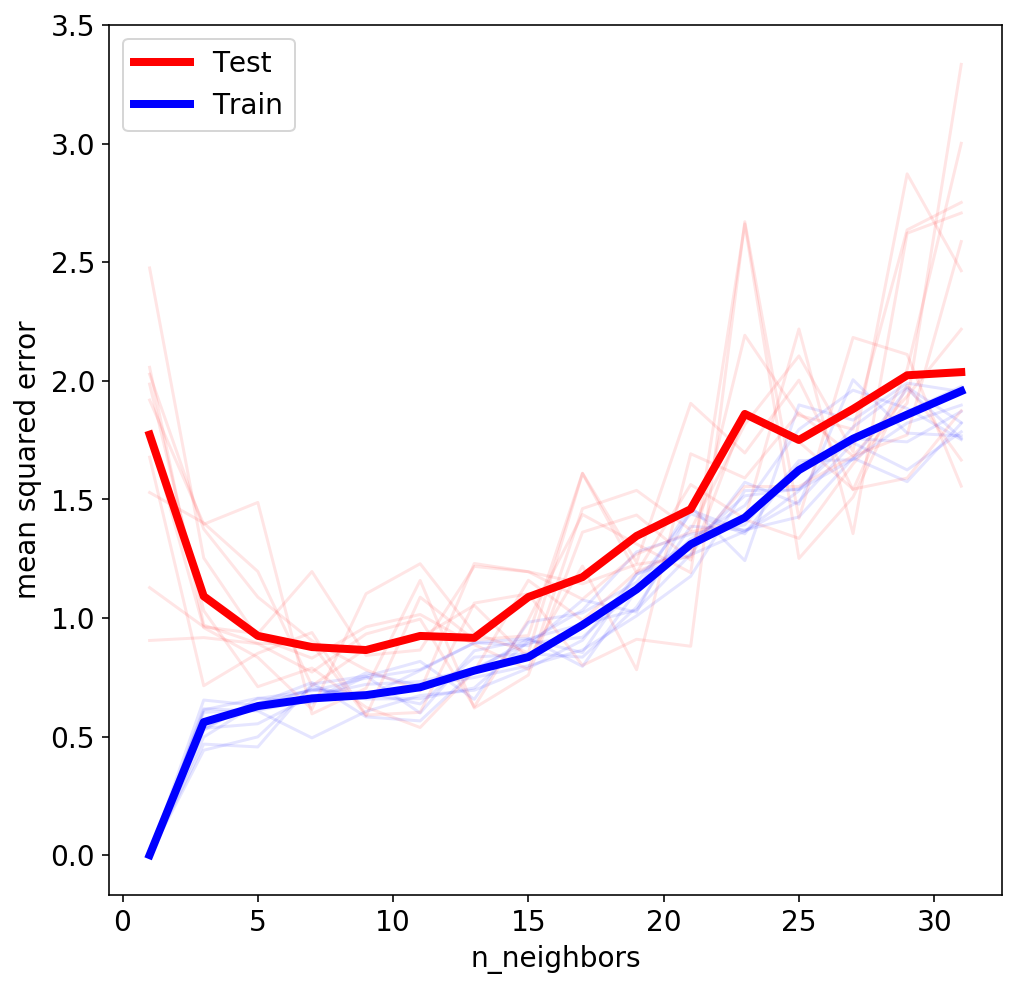

In [16]:
from sklearn.metrics import mean_squared_error

#plot the mean squared error of the classifier as a function of n_neighbors for both training and testing datasets.

k_train = np.arange(1,33,2)
mse_train = []
mse_test = []

for kt in k_train:
    r_test=[]
    r_train=[]
    for n in range(50):
        X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.7)
        rgr = KNeighborsRegressor(n_neighbors=kt)
        rgr.fit(X_train, y_train)
        y_pred = rgr.predict(X_train)
        r_train.append(mean_squared_error(y_pred, y_train))
        y_pred = rgr.predict(X_test)
        r_test.append(mean_squared_error(y_pred, y_test))
        
    mse_test.append(r_test)
    mse_train.append(r_train)

mse_test=np.array(mse_test)
mse_train=np.array(mse_train)
for n in range(10):
    plt.plot(k_train, mse_train[:,n], c='b', alpha=0.1)
    plt.plot(k_train, mse_test[:,n], c='r', alpha=0.1)
    
plt.plot(k_train, mse_test.mean(axis=1), label='Test', c='r', lw=4)
plt.plot(k_train, mse_train.mean(axis=1), label='Train', c='b', lw=4)
plt.xlabel('n_neighbors')
plt.ylabel('mean squared error')
plt.legend(loc='best')

#comment on the similarities and differences between the performance on the testing and training dataset.
#The observed behaviour is the same as for the classification, 
#except that the curves are inverted as we are now looking for the lowest possible mse instead of the highest score

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

#find the best setting of n_neighbors for this dataset.
param_grid = {'n_neighbors':  np.arange(1, 33, 2)}

grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid,scoring=mse_scorer)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

#why is this the best setting?
#Because for this random distribution and validation-split it best categorizes the test set.
#It neither under- nor overfittes the model.

#can you explain why the mean square error on the training dataset plateaus between ~n_neighbors=5 to 15
# at the value that it does?
#Less than 5 n_neighbors seem to be to less to take into the account the noise in the training data.
#The model is overfitted (training performs near perfect, while test is much worse)
#For more than 15 n_neighbors the model tries to find a to smooth function and local information is lost. 
#The plateau value between k=5-15 seems to correspond to the the best possibe model we can create
#with the given training set

best mean cross-validation score: -0.997
best parameters: {'n_neighbors': 5}
test-set score: -0.572


---

## Question 3

Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem. Think about what method you could use to increase the complexity of a logistic regression model. Visualise the classification accuracy as a function of the model complexity.

Use `make_circles(n_samples=400, factor=.3, noise=.1)` to create a simple dataset and use the `LogisticRegression` classifier to answer the above question.

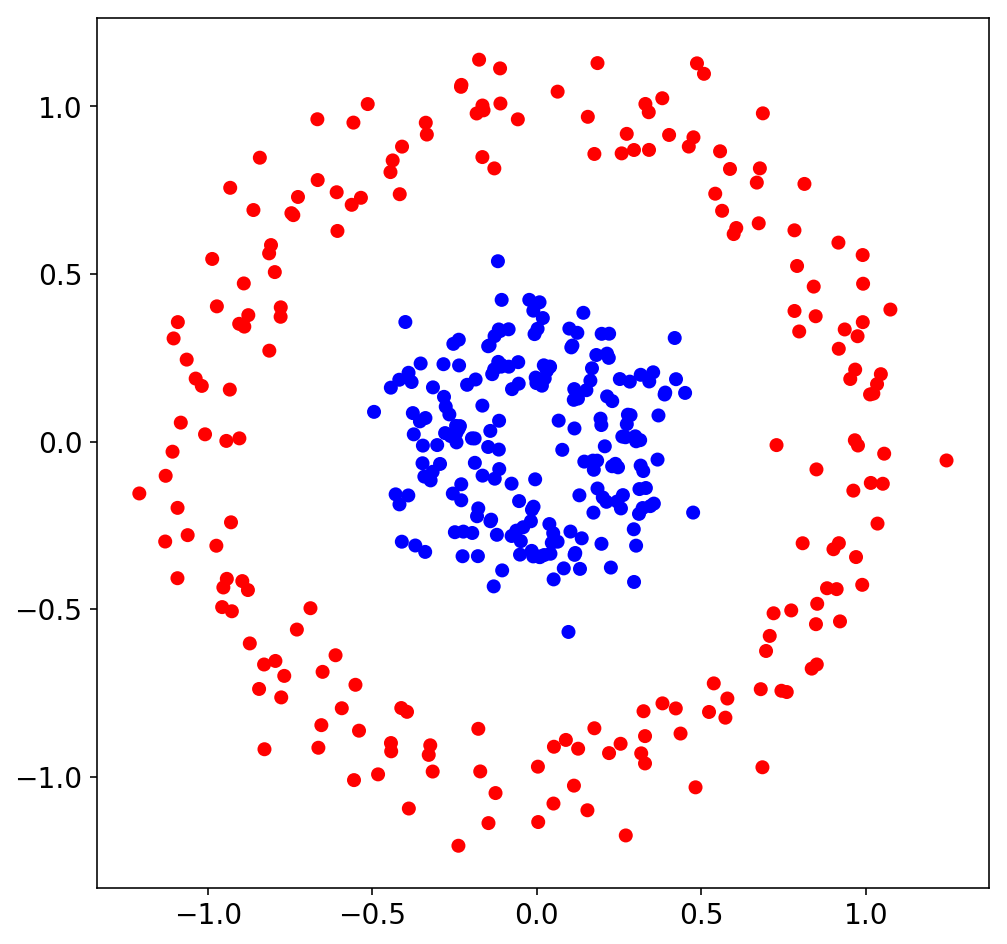

In [18]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

In [98]:
#function to visualize the classification areas

def plot_surface_poly(clf, X,poly, y, n_steps=250, subplot=None, show=True,
                 ylim=None, xlim=None):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)

    if xlim is None:
        xlim = X[:, 0].min(), X[:, 0].max()
    if ylim is None:
        ylim = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps),
                         np.linspace(ylim[0], ylim[1], n_steps))
    
    xy_poly = poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])
    z=clf.predict(xy_poly)
    z = z.reshape(xx.shape)
    z[z=='r']=1
    z[z=='b']=0
    
    plt.contourf(xx, yy, z,cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)

    if show:
        plt.show()


1.0
1.0


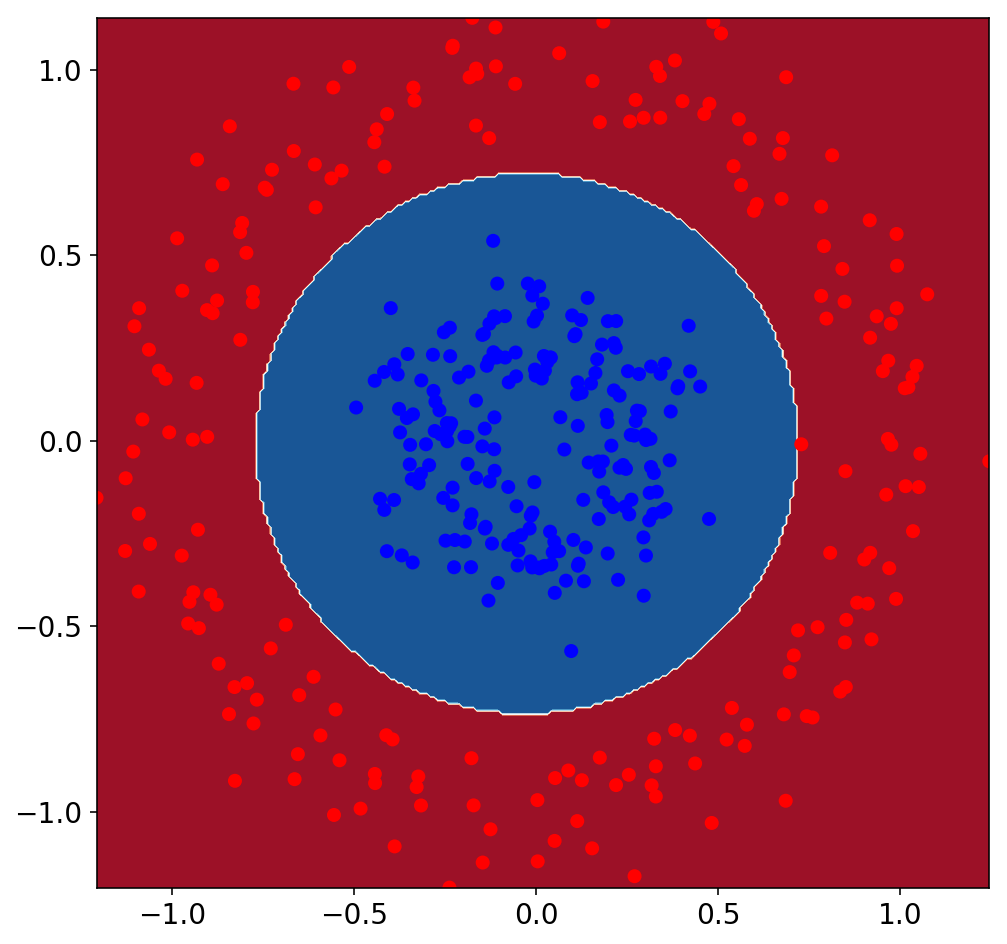

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

#transform to higher input-space
poly = PolynomialFeatures(2)
Xpoly = poly.fit_transform(X)
X_train,X_test, y_train,y_test = train_test_split(Xpoly, y, train_size=0.7)

#train one example and vizualize the trained model as surface
lrc.fit(X_train,y_train)
print lrc.score(X_test,y_test)
print lrc.score(X_train,y_train)

#use the function: xx = make_pipeline(PolynomialFeature(2), LogisticRegression())
#to make a new classifier, which first transforms the input
#this works to combine many functions to generate a new classifier object

plot_surface_poly(lrc, X, poly, y)

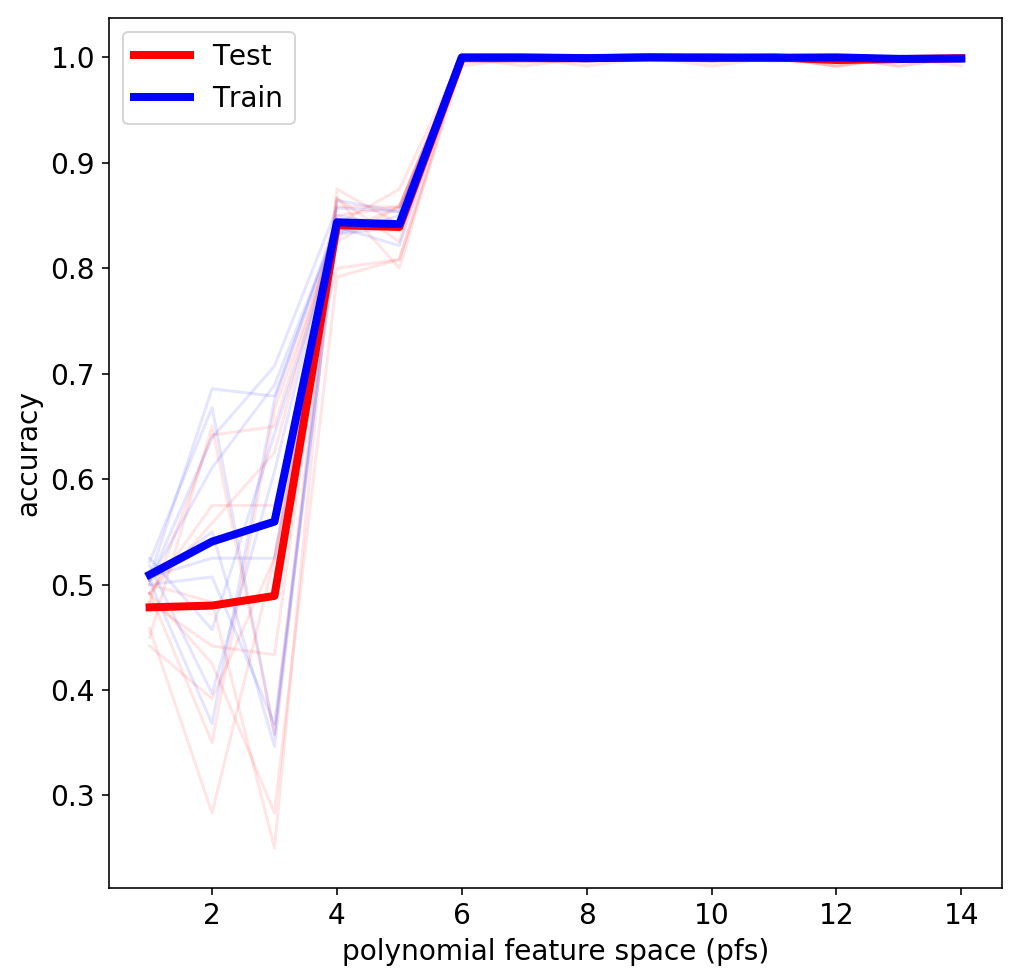

In [154]:
#Visualise the classification accuracy as a function of the model complexity
#Here I'm using the polynomial feature space as model complexity.
#As 

k_train = np.arange(1,15,1)
accuracy_train = []
accuracy_test = []
poly = PolynomialFeatures(4)
Xall = poly.fit_transform(X)

for kt in k_train:
    
    Xpoly = Xall[:,0:kt]
    acc_test=[]
    acc_train=[]
    for n in range(10):
        X_train,X_test, y_train,y_test = train_test_split(Xpoly, y, train_size=0.7)
        lrc = LogisticRegression()
        lrc.fit(X_train,y_train)
        acc_train.append(lrc.score(X_train, y_train))
        acc_test.append(lrc.score(X_test, y_test))
        
    accuracy_test.append(acc_test)
    accuracy_train.append(acc_train)

accuracy_test=np.array(accuracy_test)
accuracy_train=np.array(accuracy_train)

for n in range(10):
    plt.plot(k_train, accuracy_train[:,n], c='b', alpha=0.1)
    plt.plot(k_train, accuracy_test[:,n], c='r', alpha=0.1)
    
plt.plot(k_train, accuracy_test.mean(axis=1), label='Test', c='r', lw=4)
plt.plot(k_train, accuracy_train.mean(axis=1), label='Train', c='b', lw=4)
plt.xlabel('polynomial feature space (pfs)')
plt.ylabel('accuracy')
plt.legend(loc='best')

#here it's clear, that for a polynomial space not including x^2 and y^2 the model can't predict the label.
#as soon as one [pfs>=4](and later both [pfs>=6]) of the 2nd degree terms in included in the feature space
#the model predicts the label well. After that, the model doesn't improve any more 
#and just the calculation time increases.